### Use KNN to predict house prices for the dataset you used in exercise1

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,   
    accuracy_score, classification_report
)

### KNN - steps
1. Load data
2. EDA
3. Train | test -split
4. Scale data
5. Confussionmatrix, classification report
6. Elbow plot

In [20]:

df = pd.read_csv("../data/house_prices.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [22]:
df.keys()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df["date"].unique() # date between 140501 - 140710

In [30]:
df_cleaned = df.drop(
    columns=["date", "sqft_above", "sqft_basement", "street", "city", "country", "statezip"],
    errors="ignore"   # ignorerar namn som ev. saknas
)

df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1976,1992


In [31]:
m = df_cleaned["yr_renovated"].eq(0)
df_cleaned.loc[m, "yr_renovated"] = df.loc[m, "yr_built"] #replace the 0 with value from yr_built, after suggesstion from clever classmates

df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,1921,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1966,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1963,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1976,1992


<Axes: >

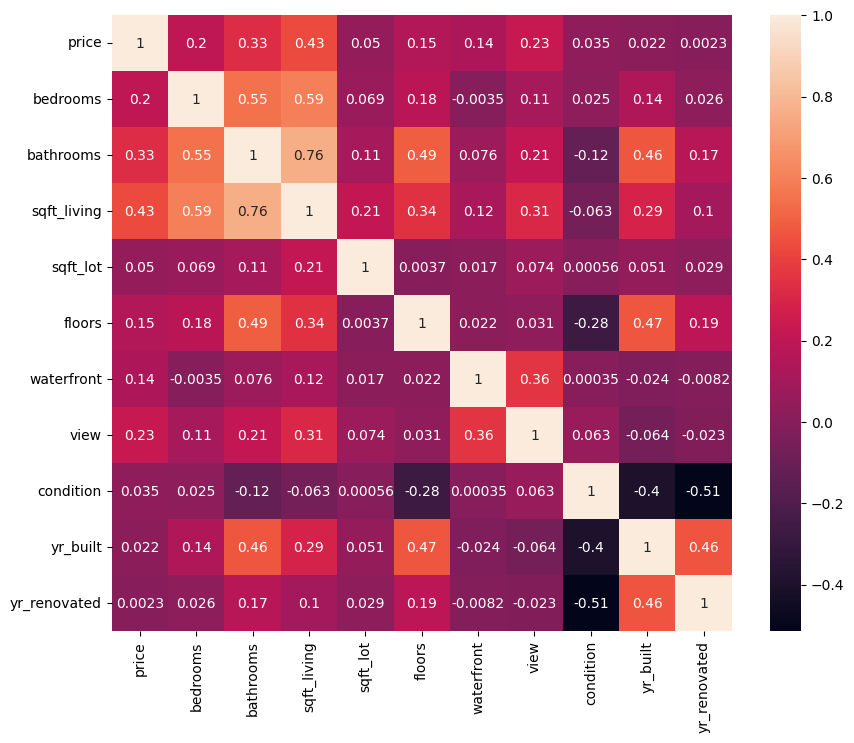

In [37]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(df_cleaned.corr(), annot = True, ax = ax)